In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
## Data Generation

In [166]:
x = np.linspace(0, 10, 100)
print(x.shape)
print(x)

(100,)
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.1818

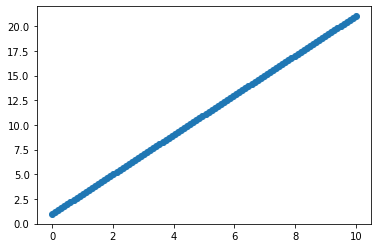

In [167]:
y = 2*x + 1
plt.scatter(x,y)
plt.show()

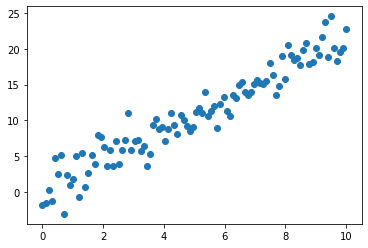

In [168]:
noise = np.random.randn(100)
y = 2*x + 1 + noise + noise
plt.scatter(x,y)
plt.show()

In [169]:
## Normalization
## mean to 0
## standard deviation to 1

# y = 40x + 0.01
# x_new = (x - x.mean())/ x.std()

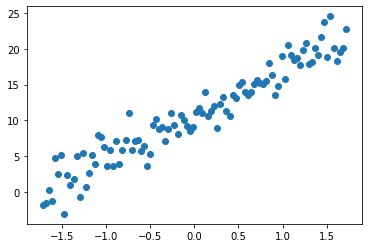

In [170]:
x = (x - x.mean())/x.std()
plt.scatter(x, y)
plt.show()

In [171]:
ones = np.ones(x.shape[0])
x = np.stack((ones, x), axis=1)
print(x.shape)
print(x)

(100, 2)
[[ 1.         -1.71481604]
 [ 1.         -1.68017329]
 [ 1.         -1.64553055]
 [ 1.         -1.6108878 ]
 [ 1.         -1.57624505]
 [ 1.         -1.5416023 ]
 [ 1.         -1.50695955]
 [ 1.         -1.4723168 ]
 [ 1.         -1.43767406]
 [ 1.         -1.40303131]
 [ 1.         -1.36838856]
 [ 1.         -1.33374581]
 [ 1.         -1.29910306]
 [ 1.         -1.26446031]
 [ 1.         -1.22981757]
 [ 1.         -1.19517482]
 [ 1.         -1.16053207]
 [ 1.         -1.12588932]
 [ 1.         -1.09124657]
 [ 1.         -1.05660382]
 [ 1.         -1.02196108]
 [ 1.         -0.98731833]
 [ 1.         -0.95267558]
 [ 1.         -0.91803283]
 [ 1.         -0.88339008]
 [ 1.         -0.84874733]
 [ 1.         -0.81410459]
 [ 1.         -0.77946184]
 [ 1.         -0.74481909]
 [ 1.         -0.71017634]
 [ 1.         -0.67553359]
 [ 1.         -0.64089084]
 [ 1.         -0.6062481 ]
 [ 1.         -0.57160535]
 [ 1.         -0.5369626 ]
 [ 1.         -0.50231985]
 [ 1.         -0.46

In [172]:
def hypothesis(x, theta):
    return np.sum(x*theta)

def gradients(x, y, theta):
    grads = np.array([0.0,0.0])
    for ix in range(x.shape[0]):
        hx = hypothesis(x[ix], theta)
        grads += (hx - y[ix])*x[ix]
    
    return grads/x.shape[0]
def error(x, y, theta):
    err = 0.0
    for ix in range(x.shape[0]):
        hx = hypothesis(x[ix], theta)
        err += (hx - y[ix])**2
    
    return (err / x.shape[0]) * 0.5
        
def gradient_descent(x, y, lr=0.03, epochs = 100):
    theta = np.array([0.1,0.3])
    error_list = []
    for _ in range(epochs):
#         print("hello")
        error_list.append(error(x, y, theta))
        grad = gradients(x,y, theta)
        theta = theta - lr * grad
#     print(error_list)
    return theta, error_list
        

(100, 2) (100,)
(10, 2)


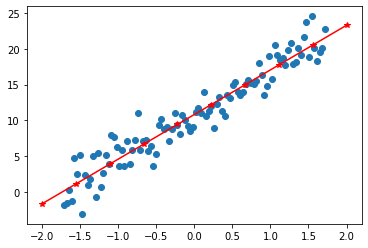

In [173]:
theta, errorlist = gradient_descent(x, y, epochs=200)

print(x.shape, y.shape)
plt.scatter(x[:, 1], y)
xtest = np.linspace(-2,2, 10)
xtest = np.stack((np.ones(10), xtest), axis=1)
print(xtest.shape)
ytest = []
for ix in xtest:
    ytest.append(hypothesis(ix, theta))
ytest = np.array(ytest)
plt.plot(xtest[:,1], ytest, marker='*',color = 'red')
plt.show()

In [174]:
theta

array([10.81443357,  6.23865926])

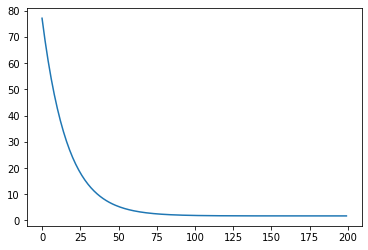

In [175]:
plt.plot(errorlist)

In [176]:
# HOME WORK

In [17]:
from sklearn.datasets import load_boston
x = load_boston()

x, y = load_boston(return_X_y = True)




# x=xi[:400]
# xtest=xi[400:506]
# y=yi[:400]
# ytest=yi[400:506]
# print(x.shape,y.shape,xtest.shape)

ones = np.ones((x.shape[0]))
x_ = np.ones((x.shape[0], x.shape[1]+1))
x_[ : , 1:] = x
print(x_.shape)

#Normalise
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

(506, 14)


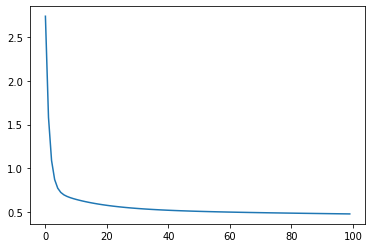

In [18]:
#batch gradient
def hypothesis(x, theta):
    return np.sum(x*theta)

def gradients(x, y, theta):
    grads = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
    for ix in range(x.shape[0]):
        hx = hypothesis(x[ix], theta)
        grads += (hx - y[ix])*x[ix]
    
    return grads/x.shape[0]
def error(x, y, theta):
    err = 0.0
    for ix in range(x.shape[0]):
        hx = hypothesis(x[ix], theta)
        err += (hx - y[ix])**2
    
    return (err / x.shape[0]) * 0.5
        
def gradient_descent(x, y, lr=0.03, epochs = 1000):
    p=np.linspace(0,1,13)
    theta = np.array(p)
    error_list = []
    for _ in range(epochs):
        error_list.append(error(x, y, theta))
        grad = gradients(x,y, theta)
        theta = theta - lr * grad
    return theta, error_list

theta, errorlist1 = gradient_descent(x, y, epochs=100)
plt.plot(errorlist1)       

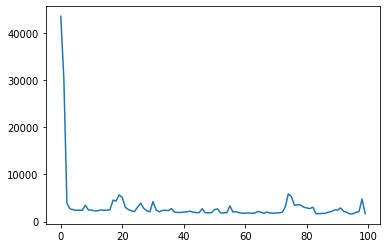

In [19]:
# stochastic regression function
def hypothesis(x, theta):
    return np.sum(x*theta)

def stochastic_gradients(x, y, theta):
    grads = np.zeros(13)
    rand=np.random.randint(x.shape[0])
    hx = hypothesis(x[rand], theta)
    grads += (hx - y[rand])*x[rand]
    
    return grads

def error(x, y, theta):
    err = 0.0
    for ix in range(x.shape[0]):
        hx = hypothesis(x[ix], theta)
        err += (hx - y[ix])**2
    
    return (err / x.shape[0]) * 0.5
        
def gradient_descent(x, y, lr=0.03, epochs = 1000):
    p=np.linspace(0,150,13)
    theta = np.array(p)
    error_list = []
    for _ in range(epochs):
        error_list.append(error(x, y, theta))
        grad = stochastic_gradients(x,y, theta)
        theta = theta - lr * grad
    return theta, error_list
theta, errorlist2 = gradient_descent(x, y, epochs=100)
plt.plot(errorlist2)        

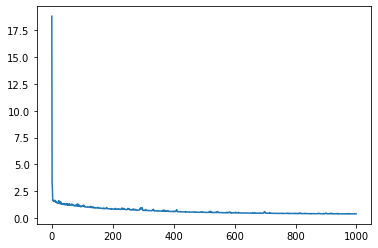

In [20]:
def hypothesis(x, theta):
    return np.sum(x*theta)

def error(x, y, theta):
    err = 0.0
    for ix in range(x.shape[0]):
        hx = hypothesis(x[ix], theta)
        err += (hx - y[ix])**2
    
    return (err / x.shape[0]) * 0.5
        
def gradient_descent(x, y, lr=0.03, epochs = 1000):
    p=np.linspace(0,3,13)
    theta = np.array(p)
    error_list = []
    for _ in range(epochs):
        error_list.append(error(x, y, theta))
        grad = miniBatch_gradient(x,y, theta)
        theta = theta - lr * grad
    return theta, error_list
        

def miniBatch_gradient(x,y,theta,batchsize=100):
    grads=np.zeros((x.shape[1]))
    rand=np.random.randint(x.shape[0]-batchsize)
    for ix in range(batchsize):
#         print(ix+rand)
        hx=hypothesis(x[ix+rand],theta)
        grads+=(hx-y[ix+rand])*x[ix+rand]
    return grads/batchsize

theta, errorlist3 = gradient_descent(x, y)
plt.plot(errorlist3)

In [21]:
p=np.zeros(6)
type(p)
rand=np.random.randint(7)
rand


0

Text(0.5, 1.0, 'MiniBatch')

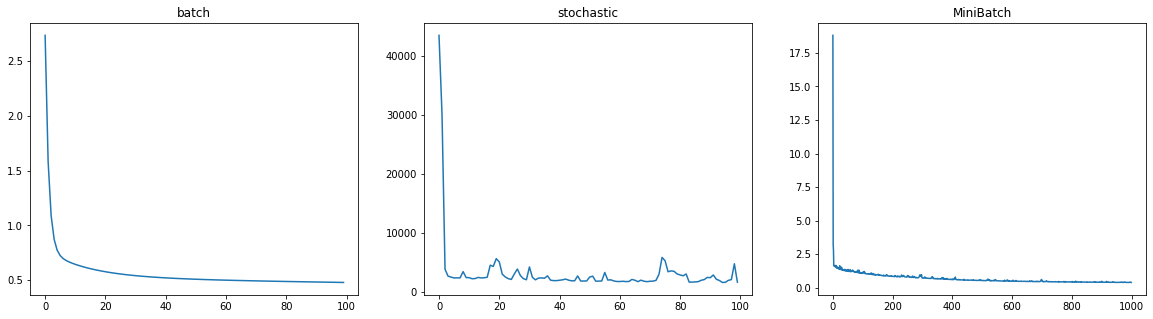

In [22]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.plot(errorlist1)
plt.title("batch")
plt.subplot(1,3,2)
plt.plot(errorlist2)
plt.title("stochastic")
plt.subplot(1,3,3)
plt.plot(errorlist3)
plt.title("MiniBatch")

In [407]:
def hypothesis(x, theta):
    return np.sum(x*theta)

def error(x, y, theta):
    err = 0.0
    for ix in range(x.shape[0]):
        hx = hypothesis(x[ix], theta)
        err += (hx - y[ix])**2
    
    return (err / x.shape[0]) * 0.5
        
def gradient_descent(x, y,batchsize=399, lr=0.03, epochs = 1000):
    p=np.linspace(0,3,13)
    theta = np.array(p)
    error_list = []
    for _ in range(epochs):
        error_list.append(error(x, y, theta))
        grad = miniBatch_gradient(x,y, theta,batchsize)
        theta = theta - lr * grad
    return theta, error_list
        

def miniBatch_gradient(x,y,theta,batchsize=399):
    grads=np.zeros((x.shape[1]))
    rand=np.random.randint(x.shape[0]-batchsize)
    for ix in range(batchsize):
#         print(ix+rand)
        hx=hypothesis(x[ix+rand],theta)
        grads+=(hx-y[ix+rand])*x[ix+rand]
    return grads/batchsize

# theta, errorlist3 = gradient_descent(x, y)
# plt.plot(errorlist3)

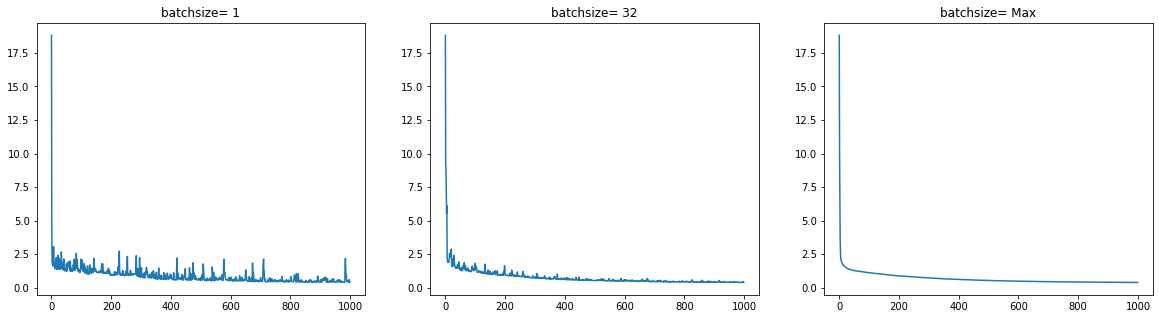

In [409]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.title("batchsize= 1")
theta, errorlist3 = gradient_descent(x, y,batchsize=1)
plt.plot(errorlist3)
plt.subplot(1,3,2)
plt.title("batchsize= 32")
theta, errorlist3 = gradient_descent(x, y,batchsize=32)
plt.plot(errorlist3)
plt.subplot(1,3,3)
plt.title("batchsize= Max")
theta, errorlist3 = gradient_descent(x, y,batchsize=399)
plt.plot(errorlist3)